# Data Wrangling

### Gather Data
**Importing Packages**

In [1]:
import pandas as pd
import numpy as np
import requests as re
import json
import tweepy
from tweepy import OAuthHandler


**Read the Twitter Archive**

In [3]:
# read twitter archive csv
df_twitter_archive_enhanced = pd.read_csv("twitter-archive-enhanced.csv")

In [6]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**Read Dog Breads from the NN**

In [7]:
# download breeds tsv file
response = re.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
with open('image_predictions.tsv', 'wb') as f:
    f.write(response.content)

In [8]:
# read breeds tsv file
df_image_predictions = pd.read_csv("image_predictions.tsv", sep='\t')
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Twitter API**

In [13]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [14]:
#Twitter's API for JSON data
tweet_except_dict = {}
# save tweet JSON in a .txt file
with open('tweet_json.txt', 'w') as tweet_json:
    for tweet_id in df_twitter_archive_enhanced["tweet_id"].values:
        print(str(tweet_id))        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Ok")
            json.dump(tweet._json, tweet_json)
            tweet_json.write('\n')
        except tweepy.TweepError as err:
            print(err)
            tweet_except_dict[tweet_id] = err
            pass
print(tweet_except_dict)

892420643555336193
Ok
892177421306343426
Ok
891815181378084864
Ok
891689557279858688
Ok
891327558926688256
Ok
891087950875897856
Ok
890971913173991426
Ok
890729181411237888
Ok
890609185150312448
Ok
890240255349198849
Ok
890006608113172480
Ok
889880896479866881
Ok
889665388333682689
Ok
889638837579907072
Ok
889531135344209921
Ok
889278841981685760
Ok
888917238123831296
Ok
888804989199671297
Ok
888554962724278272
Ok
888202515573088257
[{'code': 144, 'message': 'No status found with that ID.'}]
888078434458587136
Ok
887705289381826560
Ok
887517139158093824
Ok
887473957103951883
Ok
887343217045368832
Ok
887101392804085760
Ok
886983233522544640
Ok
886736880519319552
Ok
886680336477933568
Ok
886366144734445568
Ok
886267009285017600
Ok
886258384151887873
Ok
886054160059072513
Ok
885984800019947520
Ok
885528943205470208
Ok
885518971528720385
Ok
885311592912609280
Ok
885167619883638784
Ok
884925521741709313
Ok
884876753390489601
Ok
884562892145688576
Ok
884441805382717440
Ok
884247878851493888


Ok
831552930092285952
Ok
831322785565769729
Ok
831315979191906304
Ok
831309418084069378
Ok
831262627380748289
Ok
830956169170665475
Ok
830583320585068544
Ok
830173239259324417
Ok
830097400375152640
Ok
829878982036299777
Ok
829861396166877184
Ok
829501995190984704
Ok
829449946868879360
Ok
829374341691346946
Ok
829141528400556032
Ok
829011960981237760
Ok
828801551087042563
Ok
828770345708580865
Ok
828708714936930305
Ok
828650029636317184
Ok
828409743546925057
Ok
828408677031882754
Ok
828381636999917570
Ok
828376505180889089
Ok
828372645993398273
Ok
828361771580813312
Ok
828046555563323392
Ok
828011680017821696
Ok
827933404142436356
Ok
827653905312006145
Ok
827600520311402496
Ok
827324948884643840
Ok
827228250799742977
[{'code': 144, 'message': 'No status found with that ID.'}]
827199976799354881
Ok
826958653328592898
Ok
826848821049180160
Ok
826615380357632002
Ok
826598799820865537
Ok
826598365270007810
Ok
826476773533745153
Ok
826240494070030336
Ok
826204788643753985
Ok
8261152722726502

Ok
783839966405230592
Ok
783821107061198850
Ok
783695101801398276
Ok
783466772167098368
Ok
783391753726550016
Ok
783347506784731136
Ok
783334639985389568
Ok
783085703974514689
Ok
782969140009107456
Ok
782747134529531904
Ok
782722598790725632
Ok
782598640137187329
Ok
782305867769217024
Ok
782021823840026624
Ok
781955203444699136
Ok
781661882474196992
Ok
781655249211752448
Ok
781524693396357120
Ok
781308096455073793
Ok
781251288990355457
Ok
781163403222056960
Ok
780931614150983680
Ok
780858289093574656
Ok
780800785462489090
Ok
780601303617732608
Ok
780543529827336192
Ok
780496263422808064
Ok
780476555013349377
Ok
780459368902959104
Ok
780192070812196864
Ok
780092040432480260
Ok
780074436359819264
Ok
779834332596887552
Ok
779377524342161408
Ok
779124354206535695
Ok
779123168116150273
Ok
779056095788752897
Ok
778990705243029504
Ok
778774459159379968
Ok
778764940568104960
Ok
778748913645780993
Ok
778650543019483137
Ok
778624900596654080
Ok
778408200802557953
Ok
778396591732486144
Ok
7783833

Ok
738891149612572673
Ok
738885046782832640
Ok
738883359779196928
Ok
738537504001953792
Ok
738402415918125056
Ok
738184450748633089
Ok
738166403467907072
Ok
738156290900254721
Ok
737826014890496000
Ok
737800304142471168
Ok
737678689543020544
Ok
737445876994609152
Ok
737322739594330112
Ok
737310737551491075
Ok
736736130620620800
Ok
736392552031657984
Ok
736365877722001409
Ok
736225175608430592
Ok
736010884653420544
Ok
735991953473572864
Ok
735648611367784448
Ok
735635087207878657
Ok
735274964362878976
Ok
735256018284875776
Ok
735137028879360001
Ok
734912297295085568
Ok
734787690684657664
Ok
734776360183431168
Ok
734559631394082816
Ok
733828123016450049
Ok
733822306246479872
Ok
733482008106668032
Ok
733460102733135873
Ok
733109485275860992
Ok
732732193018155009
Ok
732726085725589504
Ok
732585889486888962
Ok
732375214819057664
Ok
732005617171337216
Ok
731285275100512256
Ok
731156023742988288
Ok
730924654643314689
Ok
730573383004487680
Ok
730427201120833536
Ok
730211855403241472
Ok
7301967

Ok
695629776980148225
Ok
695446424020918272
Ok
695409464418041856
Ok
695314793360662529
Ok
695095422348574720
Ok
695074328191332352
Ok
695064344191721472
Ok
695051054296211456
Ok
694925794720792577
Ok
694905863685980160
Ok
694669722378485760
Ok
694356675654983680
Ok
694352839993344000
Ok
694342028726001664
Ok
694329668942569472
Ok
694206574471057408
Ok
694183373896572928
Ok
694001791655137281
Ok
693993230313091072
Ok
693942351086120961
Ok
693647888581312512
Ok
693644216740769793
Ok
693642232151285760
Ok
693629975228977152
Ok
693622659251335168
Ok
693590843962331137
Ok
693582294167244802
Ok
693486665285931008
Ok
693280720173801472
Ok
693267061318012928
Ok
693262851218264065
Ok
693231807727280129
Ok
693155686491000832
Ok
693109034023534592
Ok
693095443459342336
Ok
692919143163629568
Ok
692905862751522816
Ok
692901601640583168
Ok
692894228850999298
Ok
692828166163931137
Ok
692752401762250755
Ok
692568918515392513
Ok
692535307825213440
Ok
692530551048294401
Ok
692423280028966913
Ok
6924173

Ok
676533798876651520
Ok
676496375194980353
Ok
676470639084101634
Ok
676440007570247681
Ok
676430933382295552
Ok
676263575653122048
Ok
676237365392908289
Ok
676219687039057920
Ok
676215927814406144
Ok
676191832485810177
Ok
676146341966438401
Ok
676121918416756736
Ok
676101918813499392
Ok
676098748976615425
Ok
676089483918516224
Ok
675898130735476737
Ok
675891555769696257
Ok
675888385639251968
Ok
675878199931371520
Ok
675870721063669760
Ok
675853064436391936
Ok
675849018447167488
Ok
675845657354215424
Ok
675822767435051008
Ok
675820929667219457
Ok
675798442703122432
Ok
675781562965868544
Ok
675740360753160193
Ok
675710890956750848
Ok
675707330206547968
Ok
675706639471788032
Ok
675534494439489536
Ok
675531475945709568
Ok
675522403582218240
Ok
675517828909424640
Ok
675501075957489664
Ok
675497103322386432
Ok
675489971617296384
Ok
675483430902214656
Ok
675432746517426176
Ok
675372240448454658
Ok
675362609739206656
Ok
675354435921575936
Ok
675349384339542016
Ok
675334060156301312
Ok
6751668

Ok
668852170888998912
Ok
668826086256599040
Ok
668815180734689280
Ok
668779399630725120
Ok
668655139528511488
Ok
668645506898350081
Ok
668643542311546881
Ok
668641109086707712
Ok
668636665813057536
Ok
668633411083464705
Ok
668631377374486528
Ok
668627278264475648
Ok
668625577880875008
Ok
668623201287675904
Ok
668620235289837568
Ok
668614819948453888
Ok
668587383441514497
Ok
668567822092664832
Ok
668544745690562560
Ok
668542336805281792
Ok
668537837512433665
Ok
668528771708952576
Ok
668507509523615744
Ok
668496999348633600
Ok
668484198282485761
Ok
668480044826800133
Ok
668466899341221888
Ok
668297328638447616
Ok
668291999406125056
Ok
668286279830867968
Ok
668274247790391296
Ok
668268907921326080
Ok
668256321989451776
Ok
668248472370458624
Ok
668237644992782336
Ok
668226093875376128
Ok
668221241640230912
Ok
668204964695683073
Ok
668190681446379520
Ok
668171859951755264
Ok
668154635664932864
Ok
668142349051129856
Ok
668113020489474048
Ok
667937095915278337
Ok
667924896115245057
Ok
6679154

In [315]:
# tweet_json.txt saved into a pandas DataFrame
df_tweet_json = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count', 'retweeted_status'])
with open('tweet_json.txt') as f:
    for line in f:
        status  = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        retweeted_status = status['retweeted_status'] = status.get('retweeted_status', 'Original tweet')
        df_tweet_json = df_tweet_json.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count, retweeted_status]],
                                        columns=['tweet_id', 'retweet_count', 'favorite_count', 'retweeted_status']))
df_tweet_json = df_tweet_json.reset_index(drop=True)

In [316]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 4 columns):
tweet_id            2340 non-null object
retweet_count       2340 non-null object
favorite_count      2340 non-null object
retweeted_status    2340 non-null object
dtypes: object(4)
memory usage: 73.2+ KB


### Assessing the Data
The three DataFrames will be assessed for quality and tidiness issues.

**df_twitter_archive_enhanced**

In [317]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [318]:
df_twitter_archive_enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [319]:
df_twitter_archive_enhanced["name"].isnull().sum()

0

In [320]:
sum(df_twitter_archive_enhanced.retweeted_status_user_id.value_counts())

181

In [321]:
df_twitter_archive_enhanced["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [322]:
df_twitter_archive_enhanced["rating_denominator"].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

**df_tweet_json**

In [323]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 4 columns):
tweet_id            2340 non-null object
retweet_count       2340 non-null object
favorite_count      2340 non-null object
retweeted_status    2340 non-null object
dtypes: object(4)
memory usage: 73.2+ KB


In [324]:
df_tweet_json.head(10)

,tweet_id,retweet_count,favorite_count,retweeted_status
0,892420643555336193,8259,37852,Original tweet
1,892177421306343426,6104,32527,Original tweet
2,891815181378084864,4041,24491,Original tweet
3,891689557279858688,8410,41204,Original tweet
4,891327558926688256,9109,39385,Original tweet
5,891087950875897856,3027,19798,Original tweet
6,890971913173991426,2000,11571,Original tweet
7,890729181411237888,18343,63873,Original tweet
8,890609185150312448,4160,27209,Original tweet
9,890240255349198849,7175,31200,Original tweet


In [325]:
df_tweet_json.describe()

,tweet_id,retweet_count,favorite_count,retweeted_status
count,2340,2340,2340,2340
unique,2340,1693,2009,168
top,683852578183077888,1011,0,Original tweet
freq,1,5,167,2173


**df_image_predictions**

In [326]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [327]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [328]:
df_image_predictions["jpg_url"].isnull().sum()

0

In [329]:
df_image_predictions["p1"].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
beagle                        18
Shetland_sheepdog             18
Eskimo_dog                    18
teddy                         18
Maltese_dog                   18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [330]:
sum(df_image_predictions.jpg_url.duplicated())

66

#### Quality

1. Retweeted tweets in df_tweet_json should be removed in order to only have original posts  

2. Keep only original ratings, avoiding retweets, that have images in df_twitter_archive_enhanced  

3. ID columns should be objects type, they are not intended to be numers and perform math calculations.

4. Correct numerator values extracting the values from the tweet text

5. Many dog names should be properly cleaned because aren't dog names, such as "a, an, the" etc...

6. The rating_numerator and rating_denominator columns in df_twitter_archive_enhanced should be float type in order to handle decimals

7. Duplicated jpg_url in df_image_predictions should be removed

8. Retweet and favourite count should be int and not object in df_tweet_json

9. Timestamp in df_twitter_archive_enhanced should be datetime

10. Remove empty dog names

#### Tidiness

1. The 4 different columns doggo, floofer, pupper and puppo, refer to the dog stages of one dog, so they should be combined into one column

2. The three datasets should be merged into one master dataframe


### Clean

In [331]:
# Copies of the DataFrames
df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweet_json_clean = df_tweet_json.copy()

##### Define
Retweeted tweets in df_tweet_json should be removed in order to only have original posts  

##### Code

In [332]:
df_tweet_json_clean = df_tweet_json_clean[df_tweet_json_clean['retweeted_status'] == 'Original tweet']

##### Test

In [333]:
df_tweet_json_clean['retweeted_status'].value_counts()

Original tweet    2173
Name: retweeted_status, dtype: int64

##### Define
Keep only original ratings, avoiding retweets, that have images in df_twitter_archive_enhanced  

##### Code

In [334]:
df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced_clean[pd.isnull(df_twitter_archive_enhanced_clean['retweeted_status_user_id'])]

##### Test

In [335]:
sum(df_twitter_archive_enhanced_clean.retweeted_status_user_id.value_counts())

0

##### Define
ID columns should be objects type, they are not intended to be numers and perform math calculations

##### Code

In [336]:
df_image_predictions_clean.tweet_id = df_image_predictions_clean.tweet_id.astype(str)
df_twitter_archive_enhanced_clean.tweet_id = df_twitter_archive_enhanced_clean.tweet_id.astype(str)

##### Test

In [337]:
df_image_predictions_clean.tweet_id.dtype

dtype('O')

In [338]:
df_twitter_archive_enhanced_clean.tweet_id.dtype

dtype('O')

##### Define
Correct numerator values extracting the values from the tweet text

##### Code

In [339]:
correct_rating = df_twitter_archive_enhanced_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
df_twitter_archive_enhanced_clean['rating_numerator'] = correct_rating

##### Test

In [340]:
df_twitter_archive_enhanced_clean.rating_numerator.value_counts()

12       500
10       442
11       426
13       307
9        156
8         98
7         53
14        43
5         34
6         32
3         19
4         17
2          9
1          8
0          2
420        2
666        1
143        1
9.75       1
84         1
17         1
182        1
007        1
60         1
11.27      1
204        1
45         1
165        1
11.26      1
50         1
44         1
144        1
121        1
1776       1
24         1
99         1
80         1
13.5       1
88         1
15         1
9.5        1
20         1
960        1
Name: rating_numerator, dtype: int64

##### Define
 Many dog names should be properly cleaned because aren't dog names, such as "a, an, the" etc...

##### Code

In [341]:
df_twitter_archive_enhanced_clean.loc[df_twitter_archive_enhanced_clean["name"].str.islower(), "name"] = np.nan

##### Test

In [342]:
df_twitter_archive_enhanced_clean.name.str.islower().sum()

0

##### Define
The rating_numerator and rating_denominator columns in df_twitter_archive_enhanced should be float type in order to handle decimals

##### Code

In [343]:
df_twitter_archive_enhanced_clean['rating_numerator'] = df_twitter_archive_enhanced_clean['rating_numerator'].astype(float)
df_twitter_archive_enhanced_clean['rating_denominator'] = df_twitter_archive_enhanced_clean['rating_denominator'].astype(float)

##### Test

In [344]:
df_twitter_archive_enhanced_clean.rating_numerator.dtype

dtype('float64')

In [345]:
df_twitter_archive_enhanced_clean.rating_denominator.dtype

dtype('float64')

##### Define
Duplicated jpg_url in df_image_predictions should be removed

##### Code

In [346]:
df_image_predictions_clean = df_image_predictions_clean.drop_duplicates(subset=['jpg_url'], keep='last')

##### Test

In [347]:
sum(df_image_predictions_clean['jpg_url'].duplicated())

0

##### Define
Retweet and favourite count should be int and not object in df_tweet_json

##### Code

In [348]:
df_tweet_json_clean.retweet_count = df_tweet_json_clean.retweet_count.astype(int)
df_tweet_json_clean.favorite_count = df_tweet_json_clean.favorite_count.astype(int)

##### Test

In [349]:
df_tweet_json_clean.retweet_count.dtype

dtype('int32')

In [350]:
df_tweet_json_clean.favorite_count.dtype

dtype('int32')

##### Define
Timestamp in df_twitter_archive_enhanced should be datetime

##### Code

In [351]:
df_twitter_archive_enhanced_clean.timestamp = pd.to_datetime(df_twitter_archive_enhanced_clean['timestamp'])

##### Test

In [352]:
df_twitter_archive_enhanced_clean.timestamp.head(2)

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

##### Define
Remove empty dogs name

##### Code

In [353]:
df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced_clean[df_twitter_archive_enhanced_clean['name'] != "None"]
df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced_clean[pd.notnull(df_twitter_archive_enhanced_clean['name'])]

##### Test

In [354]:
df_twitter_archive_enhanced_clean[df_twitter_archive_enhanced_clean['name'] == "None"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [355]:
df_twitter_archive_enhanced_clean['name'].isnull().sum()

0

##### Define
The 4 different columns doggo, floofer, pupper and puppo, refer to the dog stages of one dog, so they should be combined into one column

##### Code

In [356]:
# handle none
df_twitter_archive_enhanced_clean.doggo.replace('None', '', inplace=True)
df_twitter_archive_enhanced_clean.floofer.replace('None', '', inplace=True)
df_twitter_archive_enhanced_clean.pupper.replace('None', '', inplace=True)
df_twitter_archive_enhanced_clean.puppo.replace('None', '', inplace=True)

# merge into column
df_twitter_archive_enhanced_clean['dog_stage'] = df_twitter_archive_enhanced_clean.doggo + df_twitter_archive_enhanced_clean.floofer + df_twitter_archive_enhanced_clean.pupper + df_twitter_archive_enhanced_clean.puppo

# Handle multiple stages
df_twitter_archive_enhanced_clean.loc[df_twitter_archive_enhanced_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_twitter_archive_enhanced_clean.loc[df_twitter_archive_enhanced_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_twitter_archive_enhanced_clean.loc[df_twitter_archive_enhanced_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'
# Handle missing values
df_twitter_archive_enhanced_clean.loc[df_twitter_archive_enhanced_clean.dog_stage == '', 'dog_stage'] = np.nan
# Drop useless columns
df_twitter_archive_enhanced_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

##### Test

In [357]:
df_twitter_archive_enhanced_clean['dog_stage'].value_counts()

pupper           121
doggo             38
puppo             16
floofer            5
doggo, pupper      4
Name: dog_stage, dtype: int64

In [358]:
df_twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 14 columns):
tweet_id                      1391 non-null object
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1391 non-null datetime64[ns, UTC]
source                        1391 non-null object
text                          1391 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1391 non-null object
rating_numerator              1391 non-null float64
rating_denominator            1391 non-null float64
name                          1391 non-null object
dog_stage                     184 non-null object
dtypes: datetime64[ns, UTC](1), float64(6), object(7)
memory usage: 163.0+ KB


##### Define
The three datasets should be merged into one master dataframe

##### Code

In [359]:
df_temp_clean = pd.merge(df_twitter_archive_enhanced_clean, df_tweet_json_clean, on='tweet_id', how='inner')
df_master_clean = pd.merge(df_temp_clean, df_image_predictions_clean, on='tweet_id', how='inner')

##### Test

In [360]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301 entries, 0 to 1300
Data columns (total 28 columns):
tweet_id                      1301 non-null object
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1301 non-null datetime64[ns, UTC]
source                        1301 non-null object
text                          1301 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1301 non-null object
rating_numerator              1301 non-null float64
rating_denominator            1301 non-null float64
name                          1301 non-null object
dog_stage                     170 non-null object
retweet_count                 1301 non-null int32
favorite_count                1301 non-null int32
retweeted_status              1301 non-null object
jpg_url                  

### Store

In [361]:
#Store the clean DataFrame in a CSV file
df_master_clean.to_csv('twitter_archive_master.csv', index=False)

## Data Analyses and Visualization

In [362]:
import seaborn as sns
import matplotlib.pyplot as plt
df_final_master = pd.read_csv("twitter_archive_master.csv")
df_final_master.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [363]:
df_final_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 28 columns):
tweet_id                      1301 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1301 non-null object
source                        1301 non-null object
text                          1301 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1301 non-null object
rating_numerator              1301 non-null float64
rating_denominator            1301 non-null float64
name                          1301 non-null object
dog_stage                     170 non-null object
retweet_count                 1301 non-null int64
favorite_count                1301 non-null int64
retweeted_status              1301 non-null object
jpg_url                       1301 non

### What are the most common dog breeds?

In [364]:
df_final_master.p1.value_counts().head()

golden_retriever      85
Pembroke              63
Labrador_retriever    60
Chihuahua             58
pug                   37
Name: p1, dtype: int64

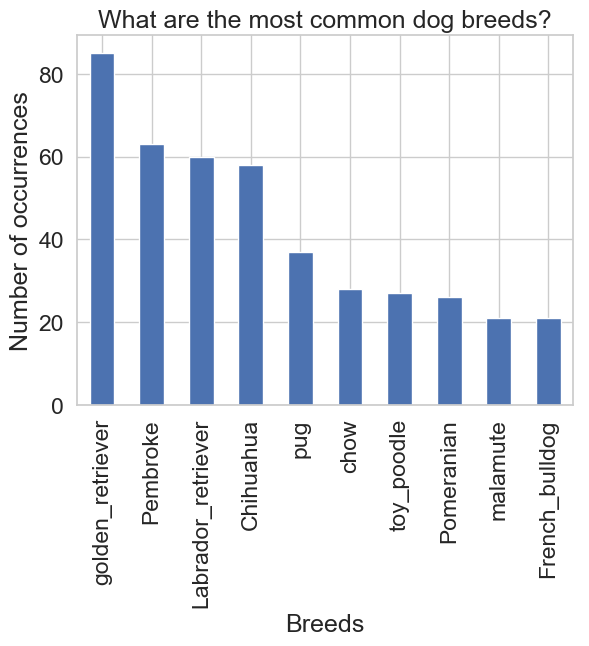

In [374]:
plt.ylabel("Number of occurrences")
plt.xlabel("Breeds")

sns.set(style="whitegrid", font_scale=1.5)
df_final_master['p1'].value_counts().nlargest(n=10, keep='first').plot(kind='bar', title="What are the most common dog breeds?")
plt.savefig('What are the most common dog breeds.png', bbox_inches='tight')

The golden and labrador retrievers appear to be the most common breeds, i can confirm this finding based on what I see in my experience every day

### Who are the dogs on the podium for the best rating?

,rating_numerator,name,jpg_url
539,1776.0,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
668,50.0,Bluebert,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg
298,24.0,Sam,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg
122,14.0,General,https://pbs.twimg.com/ext_tw_video_thumb/85222...
280,14.0,Gary,https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg
247,14.0,Sundance,https://pbs.twimg.com/ext_tw_video_thumb/82140...
243,14.0,Gabe,https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg
308,14.0,Ollie,https://pbs.twimg.com/media/CzU_YVGUUAA3Xsd.jpg
124,14.0,Iggy,https://pbs.twimg.com/media/C9ECujZXsAAPCSM.jpg
200,14.0,Kuyu,https://pbs.twimg.com/media/C4uLLGuUoAAkIHm.jpg


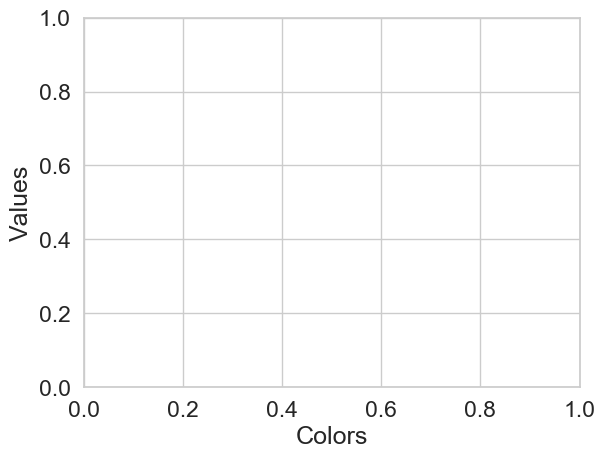

In [366]:
plt.xlabel("Colors")
plt.ylabel("Values")
df_final_master.sort_values('rating_numerator', ascending=False)[['rating_numerator', 'name', 'jpg_url']]

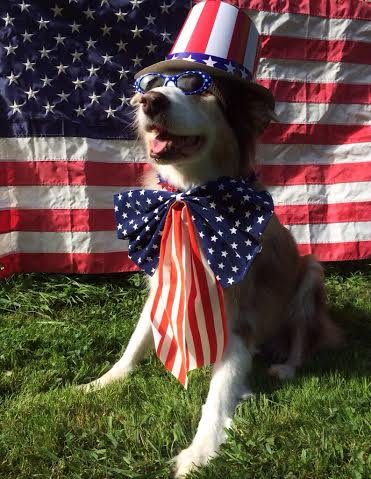

In [367]:
from IPython.display import Image

url = "https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg"
response = re.get(url)
with open('CmgBZ7kWcAAlzFD.jpg', 'wb') as f:
    f.write(response.content)
Image(filename='CmgBZ7kWcAAlzFD.jpg') 

**Atticus picture**

Atticus, Bluebert and Sam are the three dogs with the highest rating. Atticus has a stunning rating of 1776

### How the dogs stages are distributed?

In [368]:
df_final_master.dog_stage.value_counts().head()

pupper           115
doggo             32
puppo             14
floofer            5
doggo, pupper      4
Name: dog_stage, dtype: int64

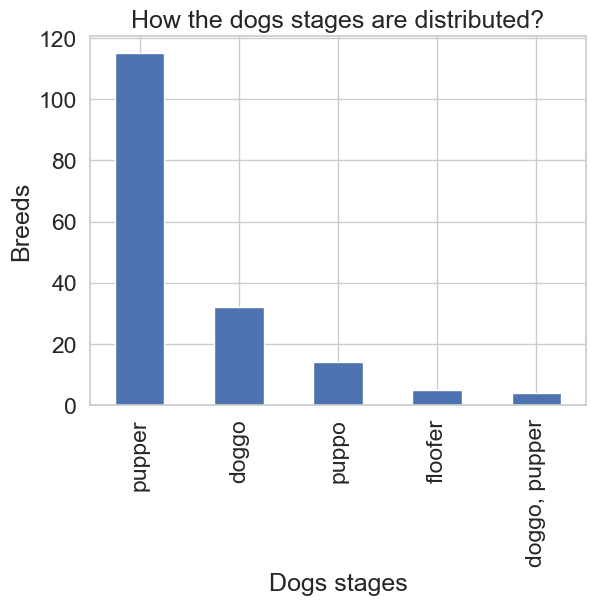

In [373]:
plt.ylabel("Breeds")
plt.xlabel("Dogs stages")
df_final_master['dog_stage'].value_counts().plot(kind='bar', title='How the dogs stages are distributed?', x='dogs stages', y ='Count')
plt.savefig('How the dogs stages are distributed.png', bbox_inches='tight')

Pupper seems to be the most common dog stage with a score 115